In [2]:
import pandas as pd
import seaborn

In [3]:
rst_colony = pd.read_excel('data/Bishayee Colony Counts 10.27.97-3.8.01.xlsx', header=1)
rst_coulter = pd.read_excel('data/Bishayee Coulter Counts.10.20.97-7.16.01.xlsx', header=1)
other_colony = pd.read_excel('data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx', header=1)
other_coulter = pd.read_excel('data/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx', header=1)
outside_1_coulter = pd.read_excel('data/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx', header=1)
outside_2_coulter = pd.read_excel('data/Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx', header=1)
outside_3_colony = pd.read_excel('data/Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx', header=1)

In [4]:
all_data = [rst_colony, rst_coulter, other_colony, other_coulter, outside_1_coulter, outside_2_coulter, outside_3_colony]

In [5]:
for df in all_data: 
    print(df.head(5))
    print('-------------------------------------------------------')

   ISOTOPE  Bate # B0/B00       Date  col1  col2 col3    average
0     131I           8405 1997-10-27    78    91   93  87.333333
1  no DMSO           8405 1997-10-27    90    88   90  89.333333
2      NaN           8405 1997-10-27    80    66   69  71.666667
3      NaN           8405 1997-10-27    63    67   71  67.000000
4      NaN           8405 1997-10-27    44    58   64  55.333333
-------------------------------------------------------
     Bates       Date  Count 1  Count 2  Count 3     Average
0  B008404 1997-10-20      531      508    541.0  526.666667
1  B008404 1997-10-20      650      626    595.0  623.666667
2  B008404 1997-10-20      460      455    468.0  461.000000
3  B008404 1997-10-20      550      530    538.0  539.333333
4  B008404 1997-10-20      466      468    452.0  462.000000
-------------------------------------------------------
  Bates # B00 or B0       Date Inv  col1   col2 col3     average
0               NaN 1992-04-23   I   266  247.0  262  258.333333
1 

In [6]:
rst_colony[['col1', 'col2','col3']] = rst_colony[['col1', 'col2', 'col3']].apply(pd.to_numeric, errors='coerce')

In [7]:
rst_colony['Minimum'] = rst_colony.loc[:, ['col1', 'col2', 'col3']].min(axis=1)
rst_colony['Maximum'] = rst_colony.loc[:, ['col1', 'col2', 'col3']].max(axis=1)
rst_colony['Median'] = rst_colony.loc[:, ['col1', 'col2', 'col3']].median(axis=1)

In [8]:
rst_colony['Mid Ratios'] = (rst_colony['Maximum'] - rst_colony['Median'])/(rst_colony['Maximum'] - rst_colony['Minimum'])

In [9]:
rst_colony.head(20)

,ISOTOPE,Bate # B0/B00,Date,col1,col2,col3,average,Minimum,Maximum,Median,Mid Ratios
0,131I,8405,1997-10-27,78,91,93.0,87.333333,78.0,93.0,91.0,0.133333
1,no DMSO,8405,1997-10-27,90,88,90.0,89.333333,88.0,90.0,90.0,0.000000
2,NaN,8405,1997-10-27,80,66,69.0,71.666667,66.0,80.0,69.0,0.785714
3,NaN,8405,1997-10-27,63,67,71.0,67.000000,63.0,71.0,67.0,0.500000
4,NaN,8405,1997-10-27,44,58,64.0,55.333333,44.0,64.0,58.0,0.300000
5,NaN,8405,1997-10-27,38,53,51.0,47.333333,38.0,53.0,51.0,0.133333
6,NaN,8405,1997-10-27,247,264,258.0,256.333333,247.0,264.0,258.0,0.352941
7,NaN,8405,1997-10-27,46,24,27.0,32.333333,24.0,46.0,27.0,0.863636
8,NaN,8405,1997-10-27,64,63,61.0,62.666667,61.0,64.0,63.0,0.333333
9,NaN,8405,1997-10-27,77,82,98.0,85.666667,77.0,98.0,82.0,0.761905


In [10]:
len(rst_colony[(rst_colony['Mid Ratios'] > 0.0) & (rst_colony['Mid Ratios'] < 1)]['Mid Ratios'])

1330

In [11]:
rst_final = rst_colony[rst_colony['Mid Ratios'] > 0.0]

# Naively making the histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114faed68>]], dtype=object)

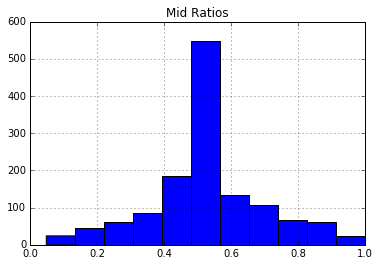

In [12]:
import matplotlib.pyplot as plt
#import seaborn

%matplotlib inline

rst_final.hist(column='Mid Ratios', bins=11)

In [13]:
import numpy as np
bins = np.arange(0.05,1.15, 0.1) 

# Playing with the binning

The histograms are still not quite identical. I can't get to the 572 data points for the other investigators that the authors have arrived at. 

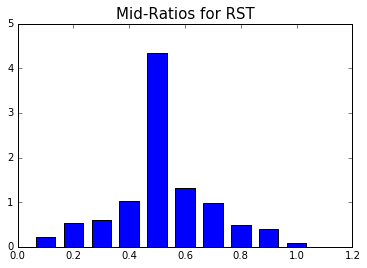

In [14]:
#plt.hist( bins=bins, normed=True)
#plt.title('Mid-Ratios f')

hist, bins = np.histogram(list(rst_final['Mid Ratios']), bins=np.arange(0.05,1.15, 0.1), normed=True)
width = 0.7 * (bins[1] - bins[0])
center = (np.arange(0.1,1.1, 0.1) ) 
plt.bar(center, hist, align='center', width=width)
plt.ylim(0, 5.)
plt.title('Mid-Ratios for RST', size=15)
plt.show()

In [15]:
other_colony[['col1', 'col2','col3', 'average']] = other_colony[['col1', 'col2', 'col3', 'average']].apply(pd.to_numeric, errors='coerce')

In [16]:
other_colony['Minimum'] = other_colony.loc[:, ['col1', 'col2', 'col3']].min(axis=1)
other_colony['Maximum'] = other_colony.loc[:, ['col1', 'col2', 'col3']].max(axis=1)
other_colony['Median'] = other_colony.loc[:, ['col1', 'col2', 'col3']].median(axis=1)

In [17]:
other_colony['Mid Ratios'] = (other_colony['Maximum'] - other_colony['Median'])/(other_colony['Maximum'] - other_colony['Minimum'])

In [18]:
len(other_colony['Mid Ratios'])

621

In [20]:
hist, bins = np.histogram(list(other_final['Mid Ratios']), bins=np.arange(0.05,1.15, 0.1), normed=True)
width = 0.7 * (bins[1] - bins[0])
center = (np.arange(0.1,1.1, 0.1) ) 
plt.bar(center, hist, align='center', width=width)
plt.ylim(0,5)
plt.show()


NameError: name 'other_final' is not defined

In [21]:
hist, bins = np.histogram(list(other_final['Mid Ratios']), bins=np.arange(0.05,1.15, 0.1), normed=True)
width = 0.7 * (bins[1] - bins[0])
center = (np.arange(0.1,1.1, 0.1) ) 
plt.bar(center, hist, align='center', width=width)
plt.ylim(0,5)
plt.show()

NameError: name 'other_final' is not defined

In [22]:
other_final = other_colony[(other_colony['Mid Ratios'] > 0)]
other_final.head(20)

,Bates # B00 or B0,Date,Inv,col1,col2,col3,average,Minimum,Maximum,Median,Mid Ratios
0,NaN,1992-04-23,I,266,247.0,262.0,258.333333,247.0,266.0,262.0,0.210526
1,NaN,1992-04-23,I,170,151.0,156.0,159.000000,151.0,170.0,156.0,0.736842
3,NaN,1992-04-23,I,22,13.0,27.0,20.666667,13.0,27.0,22.0,0.357143
4,NaN,1992-04-23,I,1,1.0,4.0,2.000000,1.0,4.0,1.0,1.000000
5,NaN,1992-04-23,I,10,13.0,12.0,11.666667,10.0,13.0,12.0,0.333333
6,NaN,1992-04-23,I,320,311.0,312.0,314.333333,311.0,320.0,312.0,0.888889
7,NaN,1992-04-23,I,194,192.0,203.0,196.333333,192.0,203.0,194.0,0.818182
8,NaN,1992-04-23,I,238,228.0,215.0,227.000000,215.0,238.0,228.0,0.434783
9,NaN,1992-04-23,I,94,81.0,79.0,84.666667,79.0,94.0,81.0,0.866667
10,NaN,1992-04-23,I,17,22.0,36.0,25.000000,17.0,36.0,22.0,0.736842


In [23]:
other_final['Inv'].unique()

array(['I', 'A', 'B', 'C', 'E', 'H', 'D', 'F', 'G'], dtype=object)

For investigator I:
data points: 48


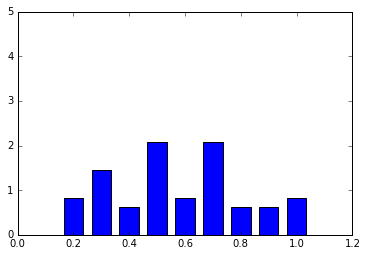

For investigator A:
data points: 250


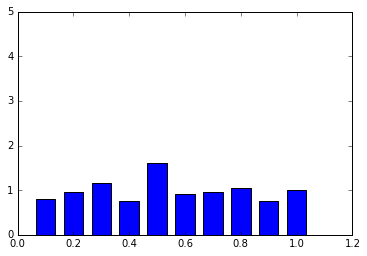

For investigator B:
data points: 54


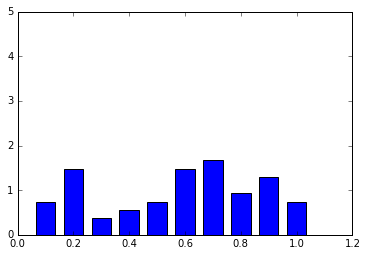

For investigator C:
data points: 86


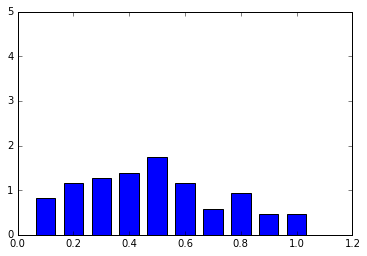

For investigator E:
data points: 10


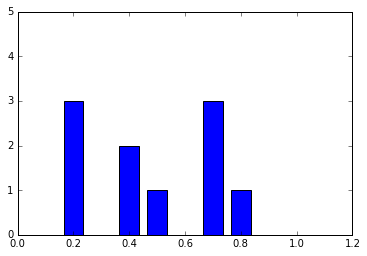

For investigator H:
data points: 21


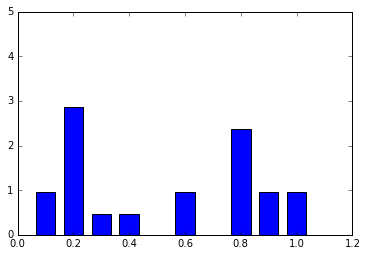

For investigator D:
data points: 81


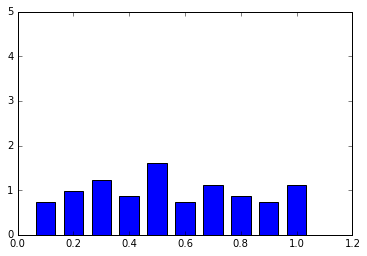

For investigator F:
data points: 28


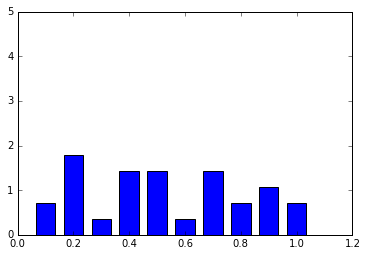

For investigator G:
data points: 9


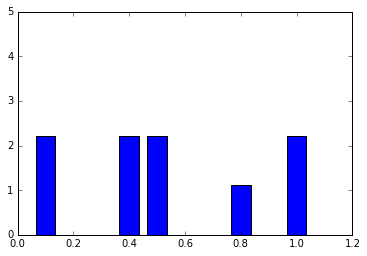

In [24]:
for investigator in ['I', 'A', 'B', 'C', 'E', 'H', 'D', 'F', 'G']:
    print ('For investigator ' + investigator + ':')
    inv = other_final[other_final['Inv'] == investigator]
    print ('data points: %d' %len(inv))
    hist, bins = np.histogram(list(inv['Mid Ratios']), bins=np.arange(0.05,1.15, 0.1), normed=True)
    width = 0.7 * (bins[1] - bins[0])
    center = (np.arange(0.1,1.1, 0.1) ) 
    plt.bar(center, hist, align='center', width=width)
    plt.ylim(0,5)
    plt.show()

In [30]:
centre

NameError: name 'centre' is not defined